In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [40]:
data = pd.read_csv("Toddler Autism dataset July 2018.csv")
data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


### A1 - A10 are some questions and their answer is given as labels '1' or '0'.

The questions are as follows :

A1 -> Does your child look at you when you call his/her name?

A2 -> How easy is it for you to get eye contact with your child?

A3 -> Does your child point to indicate that s/he wants something? (e.g. a toy that is out of reach)

A4 -> Does your child point to share interest with you? (e.g. poin9ng at an interes9ng sight)

A5 -> Does your child pretend? (e.g. care for dolls, talk on a toy phone)

A6 -> Does your child follow where you’re looking?

A7 -> If you or someone else in the family is visibly upset, does your child show signs of wan9ng to comfort them? (e.g. stroking hair, hugging them)

A8 -> Would you describe your child’s first words as:

A9 -> Does your child use simple gestures? (e.g. wave goodbye)

A10 -> Does your child stare at nothing with no apparent purpose?

In [41]:
# Detecting any missing values
data.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [42]:
data.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [43]:
data=data.drop("Case_No",axis=1)

In [44]:
#To check (column "Case_No" is dropped)
data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

# EDA (Exploratory Data Analysis) Phase

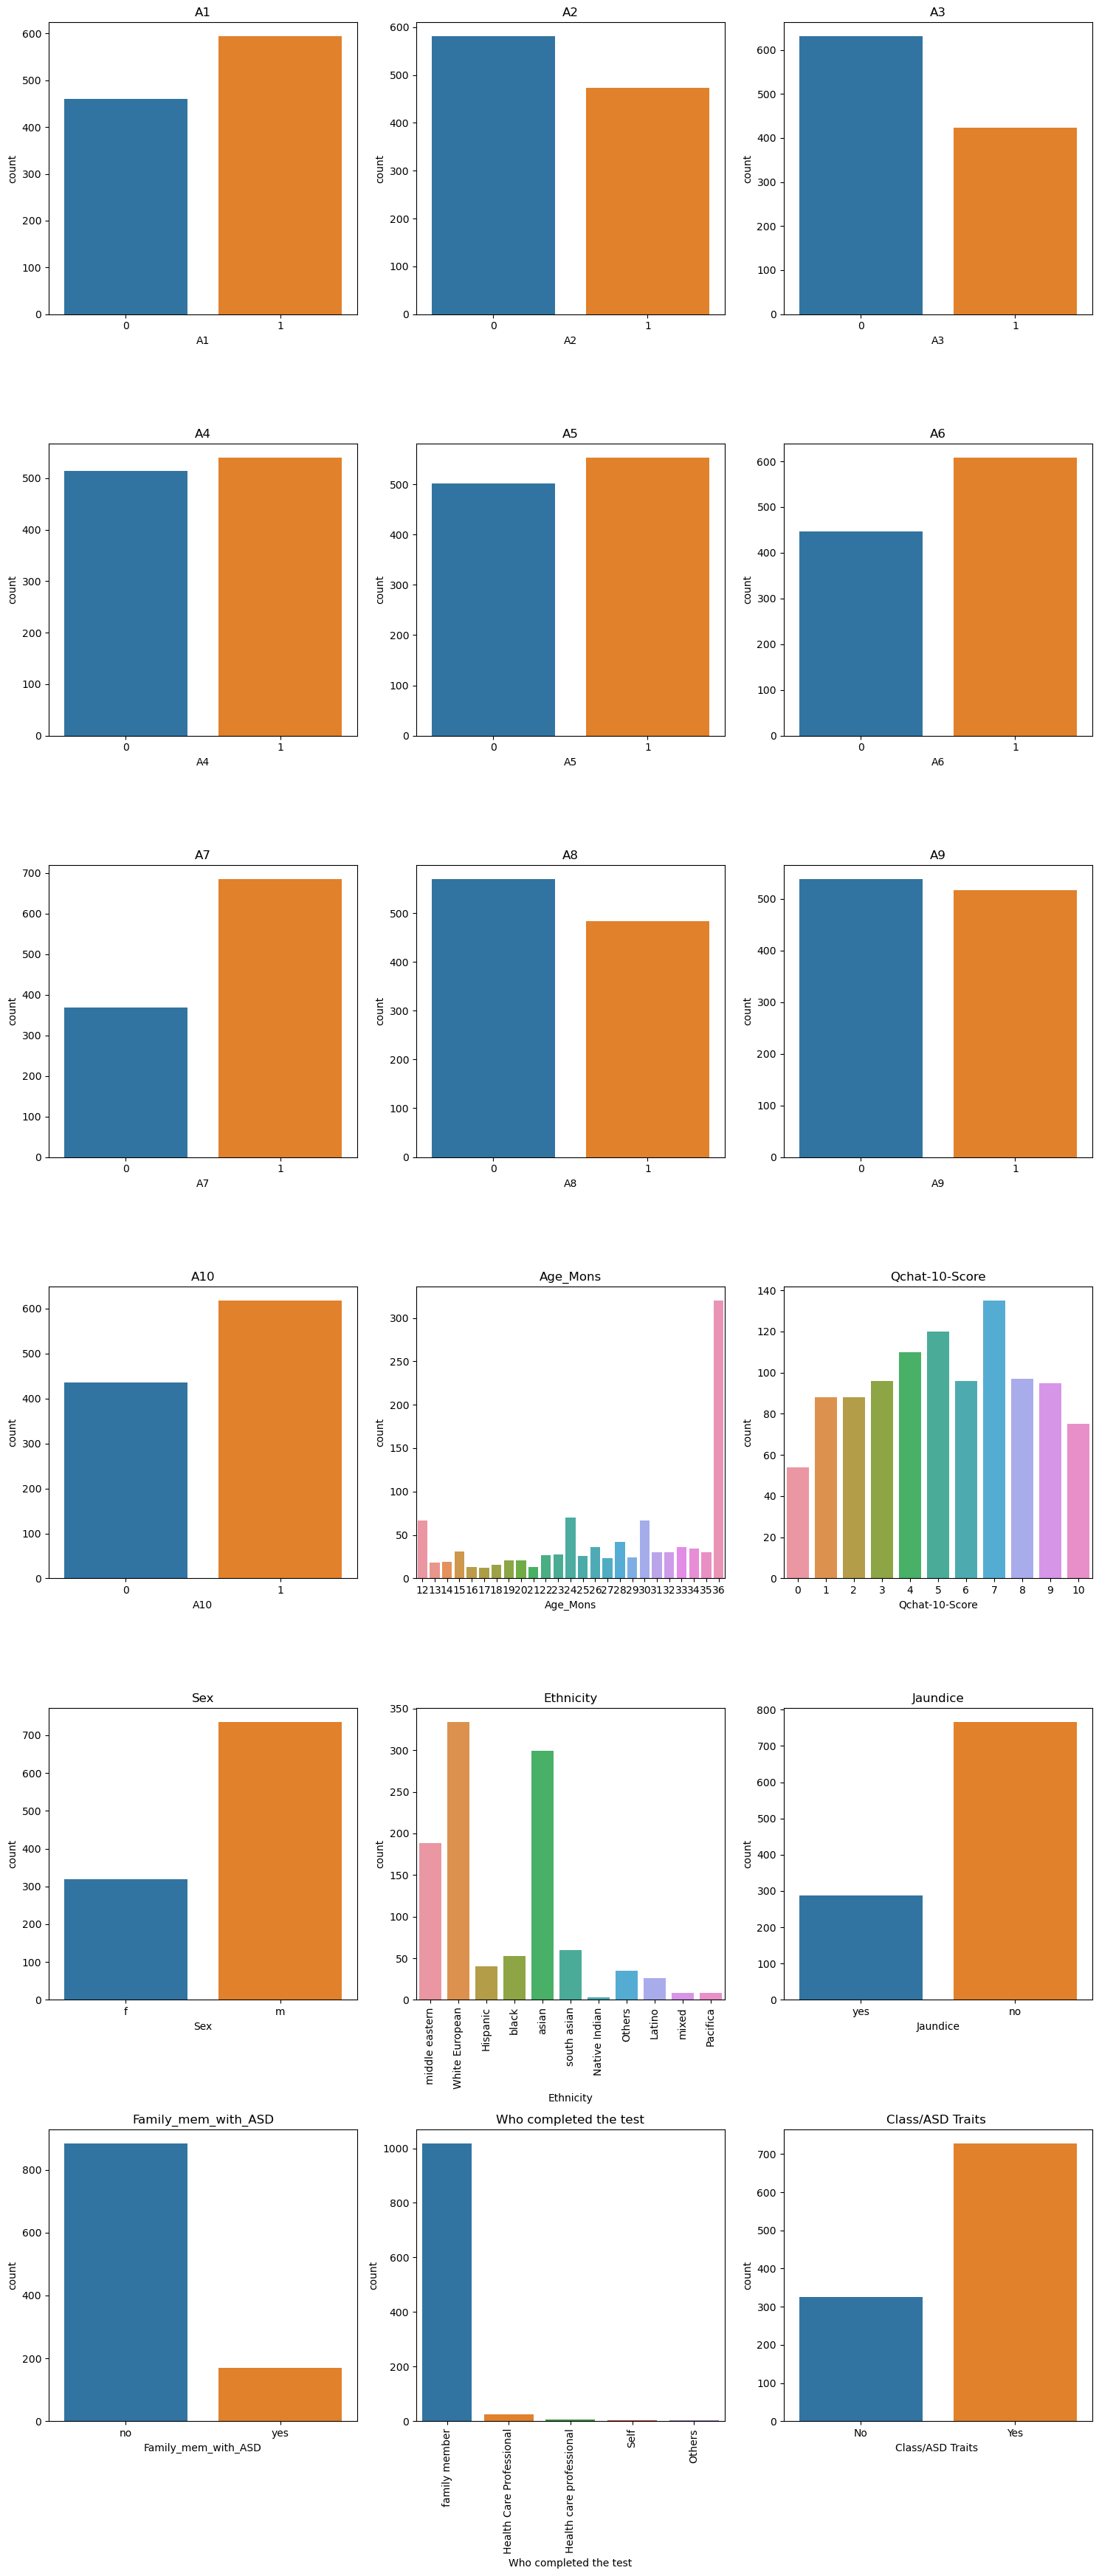

In [45]:
# Countplot for each feature
fig,axes=plt.subplots(6,3,figsize=(15,35))
axes=axes.ravel()
for i , col in enumerate(data.iloc[:,:]):
    sns.countplot(x=data[col],ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

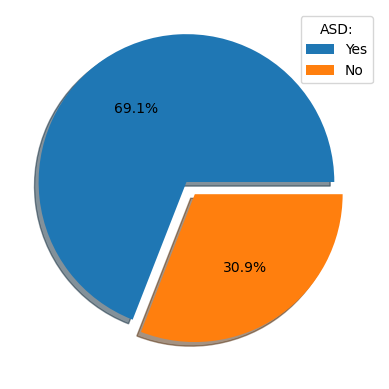

In [46]:
labels = ["Yes", "No"]
myexplode = [0.1, 0]
plt.pie(data.groupby('Class/ASD Traits ').size().reindex(labels),explode = myexplode, shadow = True,autopct='%1.1f%%')
plt.legend(title = "ASD:",labels = labels)
plt.show()

#### An estimation can be made that around 69.1% toddlers in the world are affected from Autism Spectrum Disorder.

## Analyzing Each column

### Ethnicity

In [47]:
data.groupby('Ethnicity').size()

Ethnicity
Hispanic           40
Latino             26
Native Indian       3
Others             35
Pacifica            8
White European    334
asian             299
black              53
middle eastern    188
mixed               8
south asian        60
dtype: int64

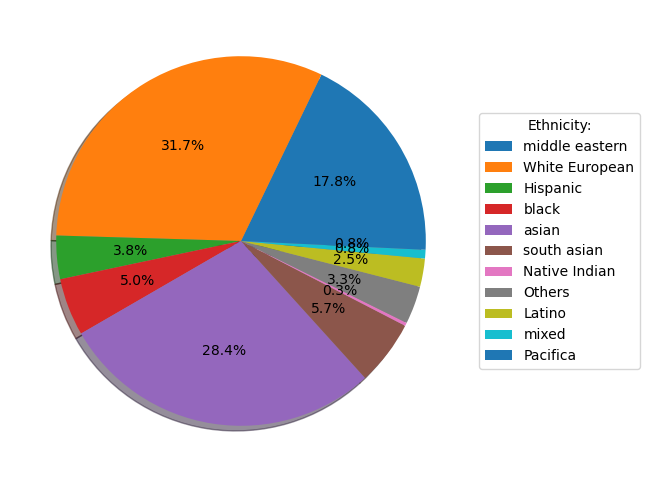

In [48]:
labels = ['middle eastern', 'White European', 'Hispanic', 'black', 'asian',
       'south asian', 'Native Indian', 'Others', 'Latino', 'mixed',
       'Pacifica']
plt.figure(figsize=(10, 6))
plt.pie(data.groupby('Ethnicity').size().reindex(labels), shadow = True,autopct='%1.1f%%')
plt.legend(title = "Ethnicity:",labels = labels,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

###### In our dataset the percentage of White European is maximum

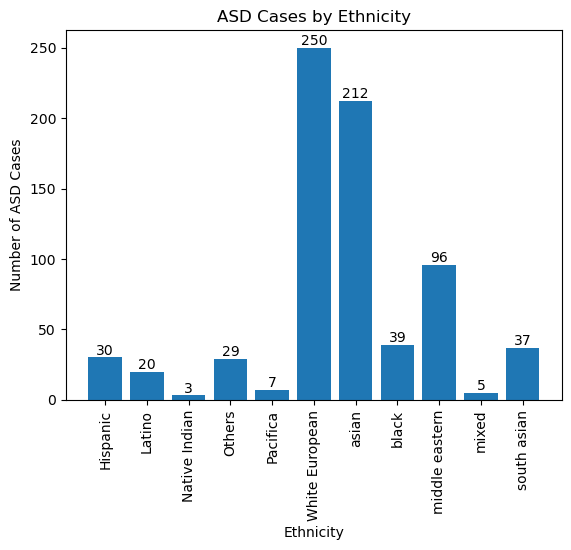

In [49]:
asd_counts_ethnicity = data[data['Class/ASD Traits '] == 'Yes'].groupby('Ethnicity').size()
bars=plt.bar(asd_counts_ethnicity.index, asd_counts_ethnicity.values)
plt.xlabel('Ethnicity')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Ethnicity')
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

###### Conclusion : White Europeans have most cases of ASD around the world followed by asians.

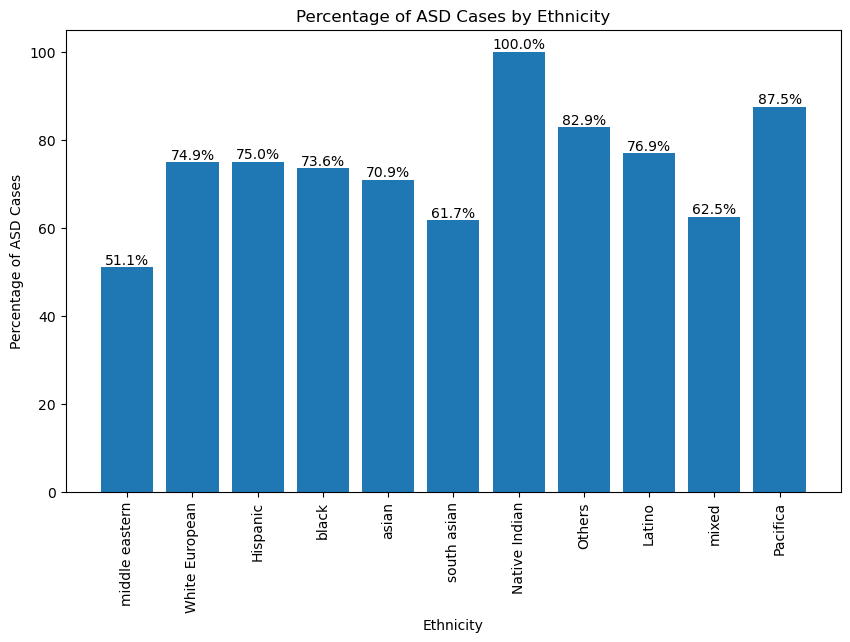

In [50]:
total_ethnicity_counts = data.groupby('Ethnicity').size()
asd_counts_ethnicity = data[data['Class/ASD Traits '] == 'Yes'].groupby('Ethnicity').size()
asd_percentage_ethnicity = (asd_counts_ethnicity / total_ethnicity_counts) * 100
plt.figure(figsize=(10, 6))
bars = plt.bar(asd_percentage_ethnicity.reindex(labels).index, asd_percentage_ethnicity.reindex(labels).values)
plt.xlabel('Ethnicity')
plt.ylabel('Percentage of ASD Cases')
plt.title('Percentage of ASD Cases by Ethnicity')
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', va='bottom', ha='center')
plt.show()

###### Conclusion: Native Indian and Pacifica ethinicity are more prone to ASD.

### Sex

In [51]:
data.groupby('Sex').size()

Sex
f    319
m    735
dtype: int64

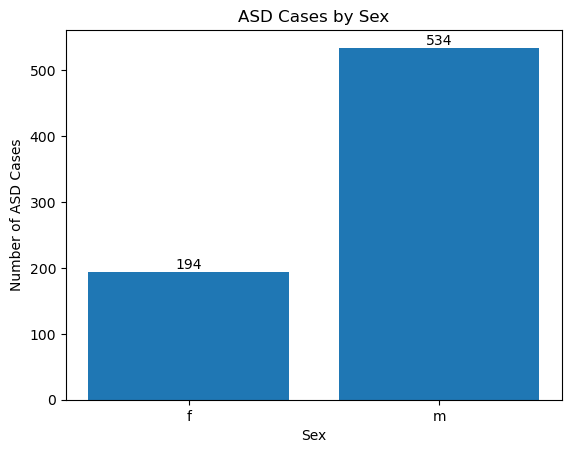

In [52]:
asd_counts_sex = data[data['Class/ASD Traits '] == 'Yes'].groupby('Sex').size()
bars=plt.bar(asd_counts_sex.index, asd_counts_sex.values)
plt.xlabel('Sex')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Sex')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

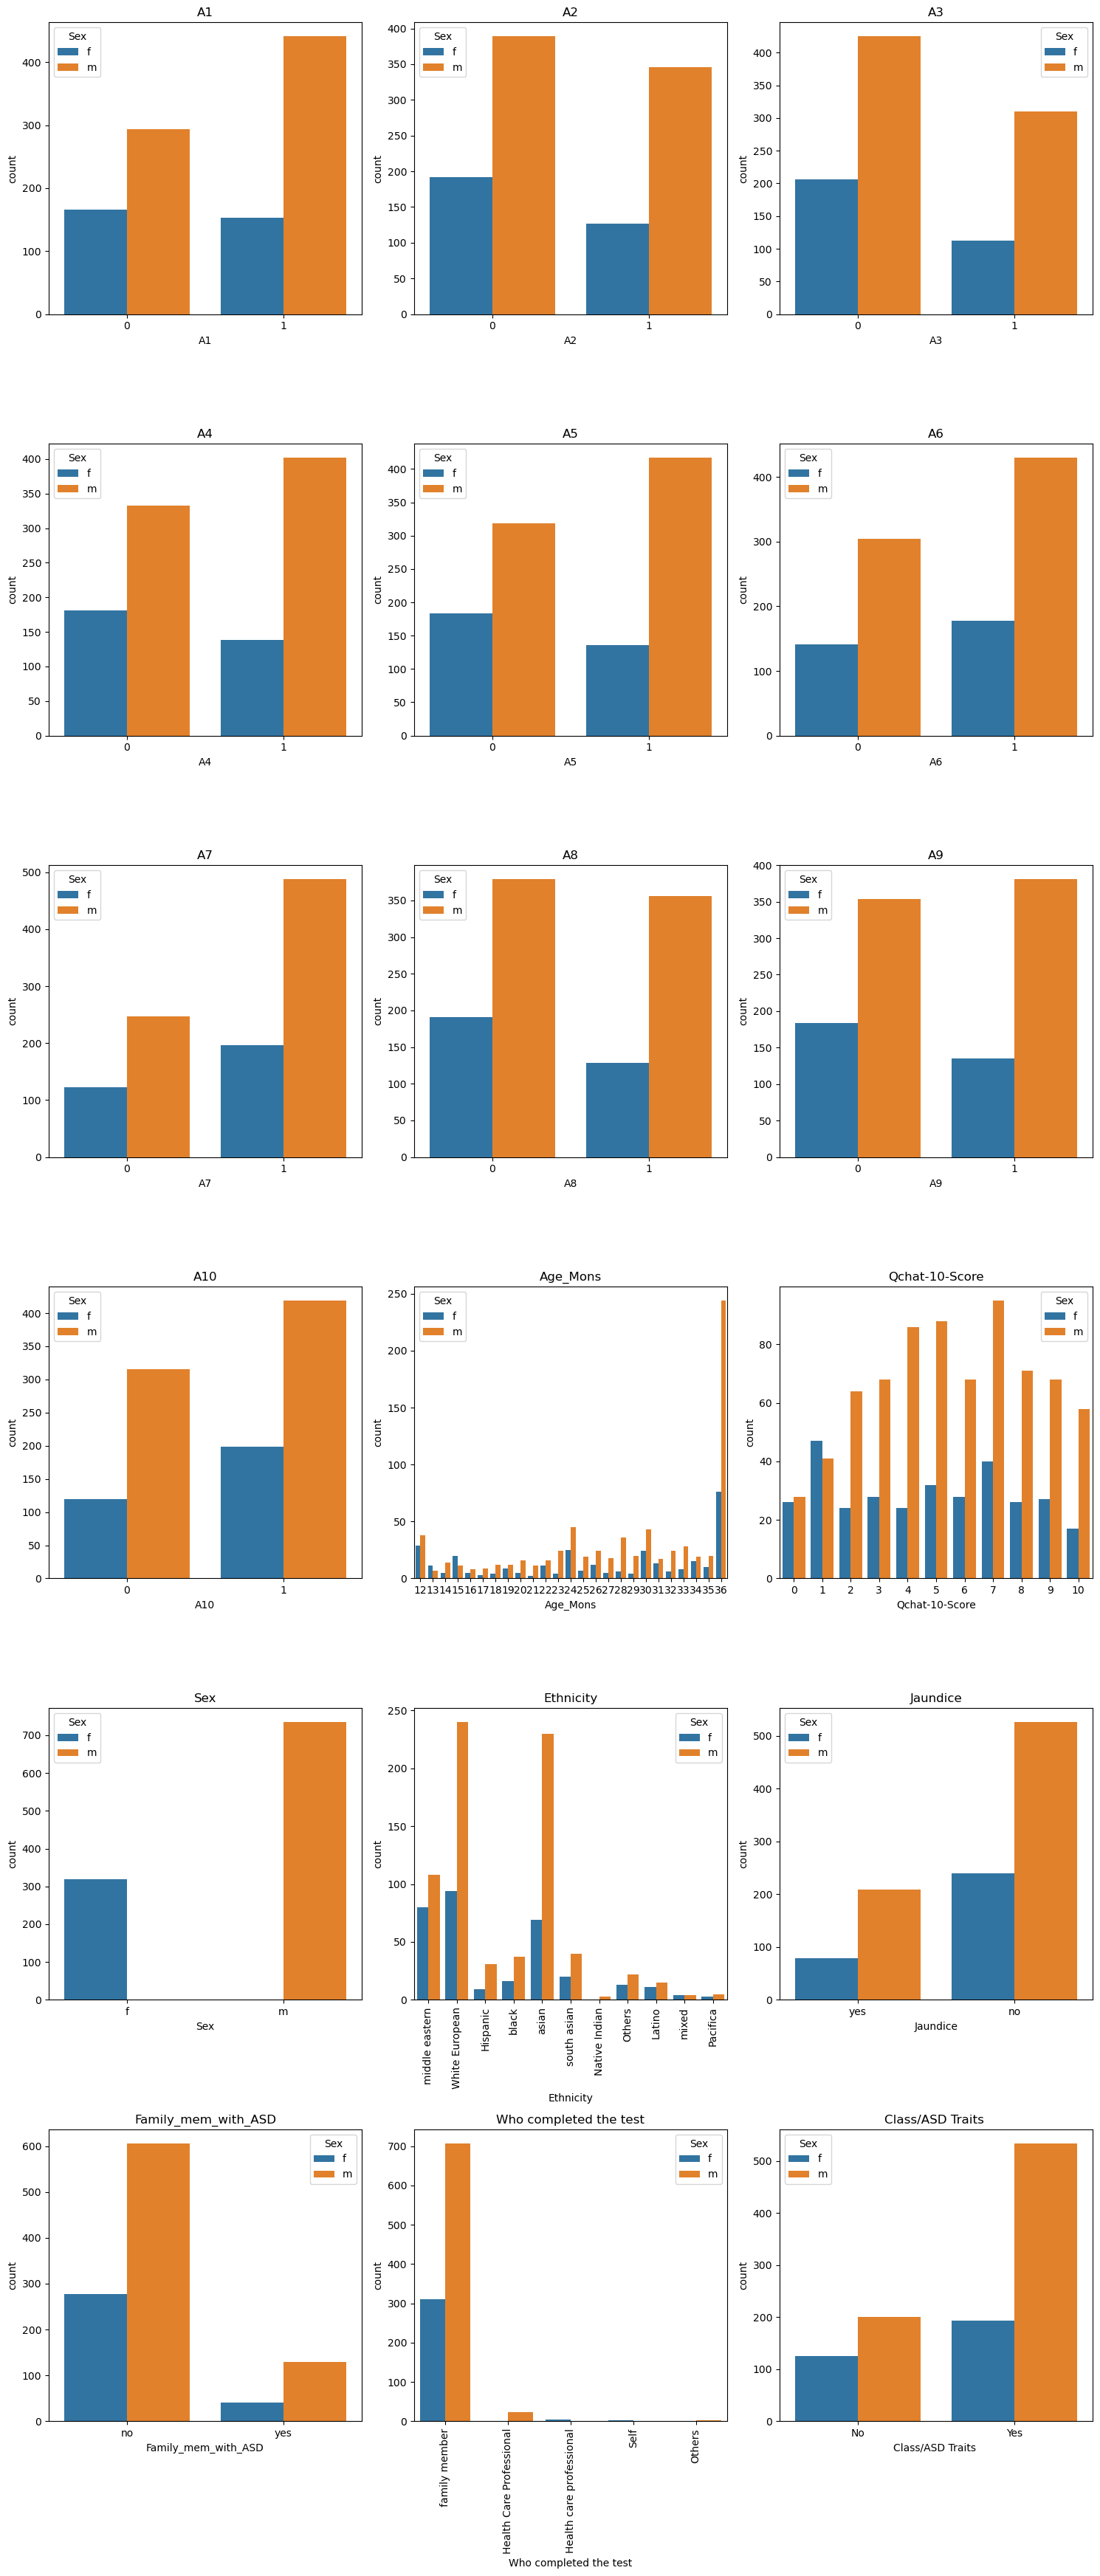

In [53]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, :]):
    sns.countplot(hue=data["Sex"], x=data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

###### Conclusion : Males are more prone to ASD in comparision to Females

### Jaundice

In [54]:
data.groupby('Jaundice').size()

Jaundice
no     766
yes    288
dtype: int64

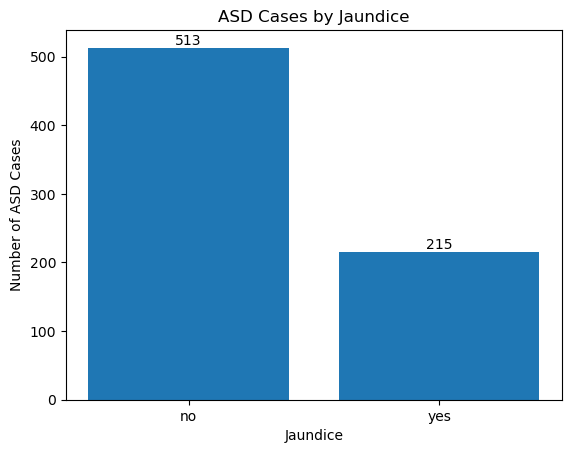

In [55]:
asd_counts_jaundice = data[data['Class/ASD Traits '] == 'Yes'].groupby('Jaundice').size()
bars=plt.bar(asd_counts_jaundice.index, asd_counts_jaundice.values)
plt.xlabel('Jaundice')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Jaundice')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

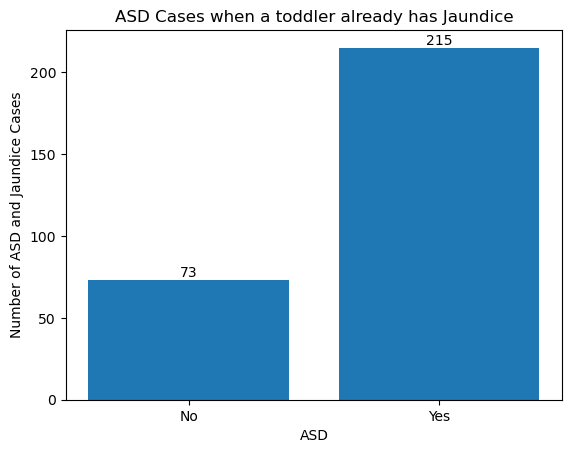

In [56]:
# Toddlers who have Jaundice and then they have ASD
asd_counts_jaundice = data[data['Jaundice']=='yes'].groupby('Class/ASD Traits ').size()
bars=plt.bar(asd_counts_jaundice.index, asd_counts_jaundice.values)
plt.xlabel('ASD')
plt.ylabel('Number of ASD and Jaundice Cases')
plt.title('ASD Cases when a toddler already has Jaundice')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()


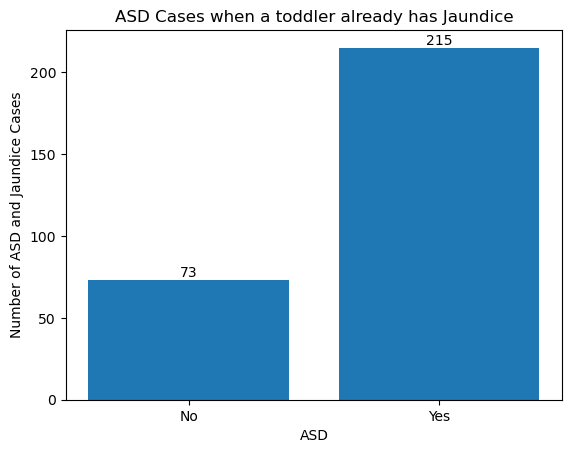

In [57]:
# Toddlers who have Jaundice and then they have ASD
asd_counts_jaundice = data[data['Jaundice']=='yes'].groupby('Class/ASD Traits ').size()
bars=plt.bar(asd_counts_jaundice.index, asd_counts_jaundice.values)
plt.xlabel('ASD')
plt.ylabel('Number of ASD and Jaundice Cases')
plt.title('ASD Cases when a toddler already has Jaundice')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()


###### Conclusion : The Toddlers having Jaundice are more prone to ASD in comparision to normal toddlers.

### Family_mem_with_ASD

In [58]:
data.groupby("Family_mem_with_ASD").size()

Family_mem_with_ASD
no     884
yes    170
dtype: int64

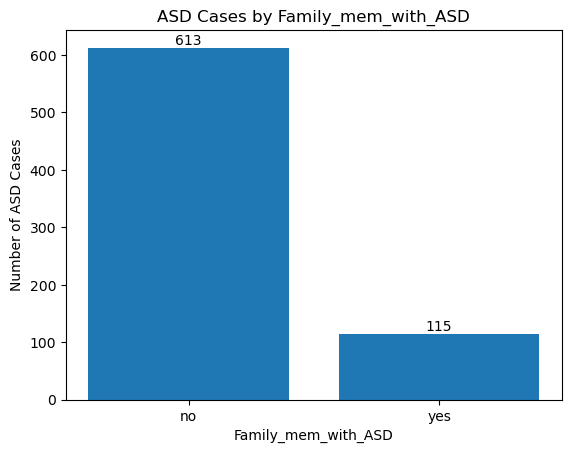

In [59]:
asd_counts = data[data['Class/ASD Traits '] == 'Yes'].groupby('Family_mem_with_ASD').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Family_mem_with_ASD')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Family_mem_with_ASD')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

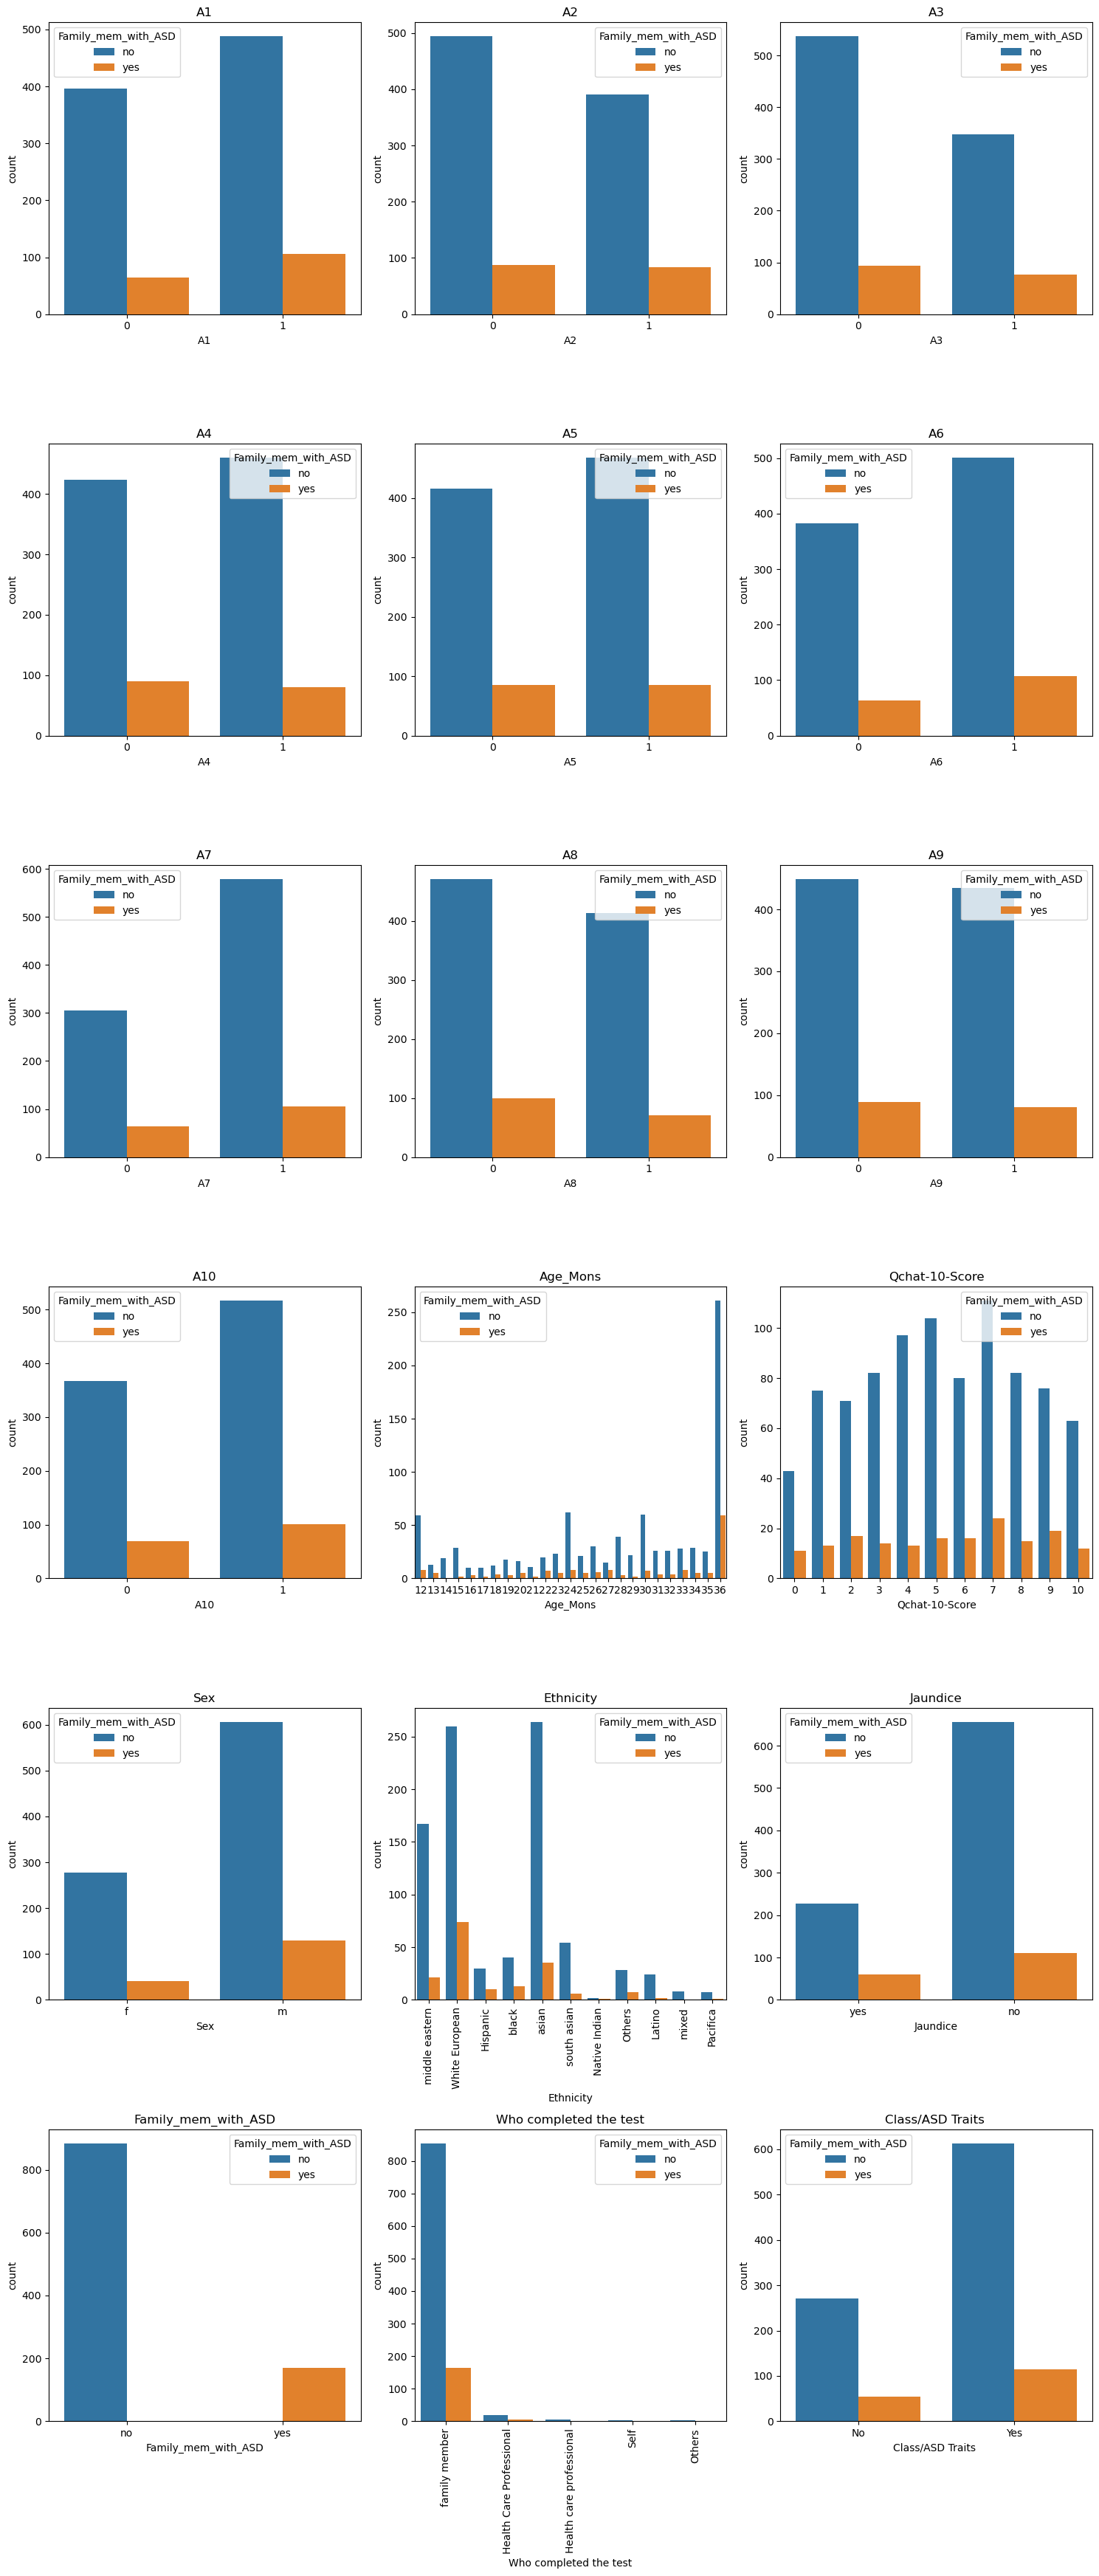

In [60]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, :]):
    sns.countplot(hue=data["Family_mem_with_ASD"], x=data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()


### Conclusion : Most of the children with ASD around the world donot have their family members with ASD that means ASD is not a genetic disease.

### Who completed the test

In [61]:
data.groupby("Who completed the test").size()

Who completed the test
Health Care Professional      24
Health care professional       5
Others                         3
Self                           4
family member               1018
dtype: int64

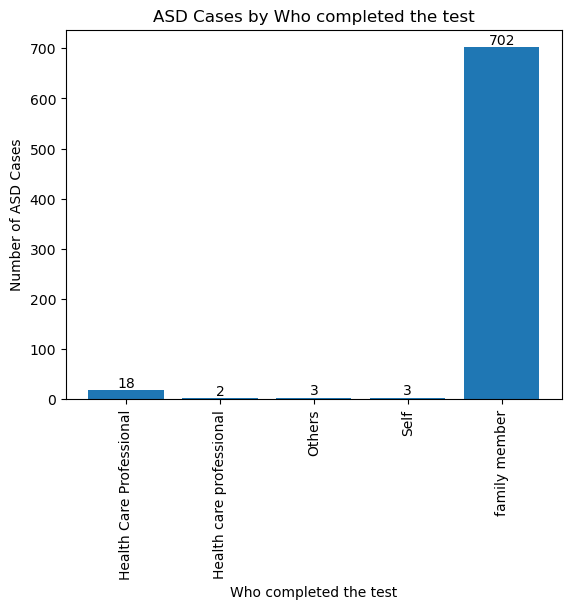

In [62]:
asd_counts = data[data['Class/ASD Traits '] == 'Yes'].groupby('Who completed the test').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Who completed the test')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Who completed the test')
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

###### Conclusion : In most of the ASD cases around the world the test is completed by a family member

### Age_Mons

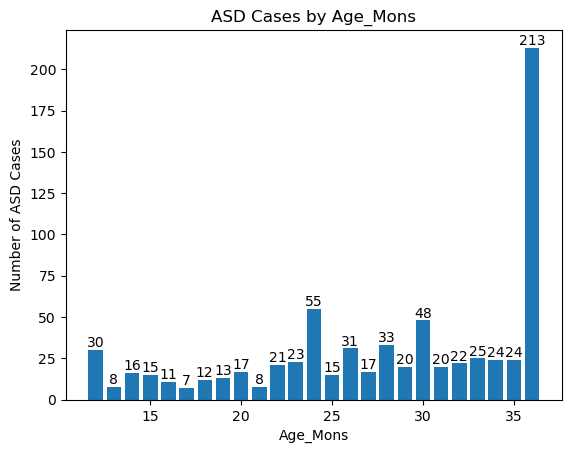

In [63]:
asd_counts = data[data['Class/ASD Traits '] == 'Yes'].groupby('Age_Mons').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Age_Mons')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Age_Mons')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

###### Conclusion : Toddlers with age 36 months have most ASD cases around the world.

In [64]:
d = pd.DataFrame()
d["Age"]=(data["Age_Mons"]/12).astype(int)
d["ASD"]=data['Class/ASD Traits ']

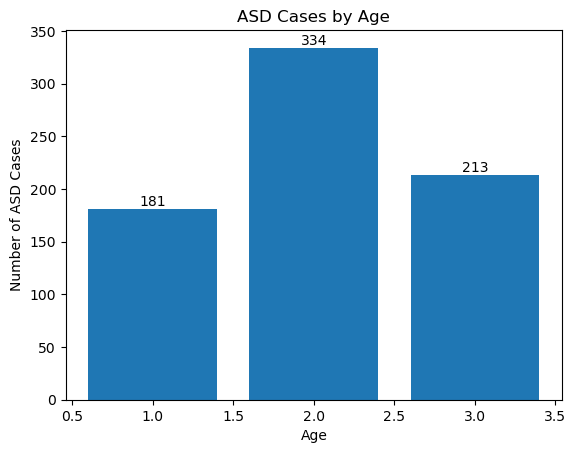

In [65]:
asd_counts = d[d['ASD'] == 'Yes'].groupby('Age').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Age')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Age')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

###### Conclusion: The chances of getting affected by ASD are highest at the age of 2 years.

### Qchat-10-Score

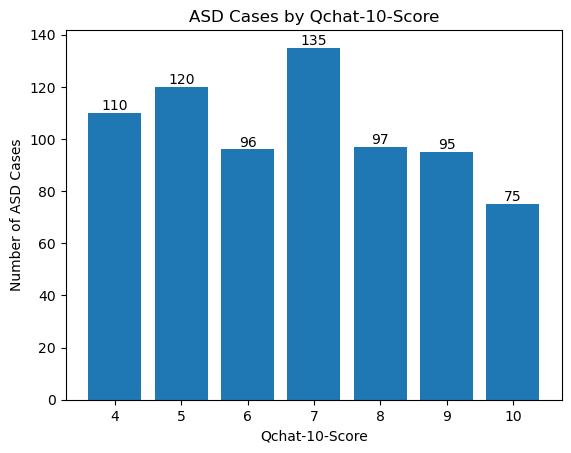

In [66]:
asd_counts = data[data['Class/ASD Traits '] == 'Yes'].groupby('Qchat-10-Score').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Qchat-10-Score')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Qchat-10-Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.xticks()
plt.show()

###### Conclusion : The toddlers with Qchat-10-Score value > 3 have ASD (Given already in the description of the dataset collected by Dr.Fadi Thabtah)

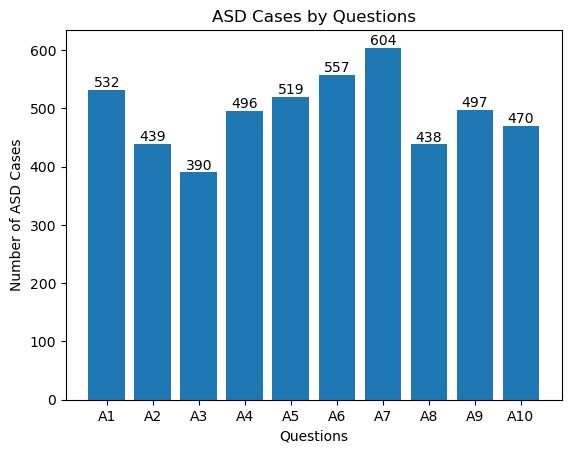

In [67]:
df=data[data['Class/ASD Traits '] == 'Yes']
sums=df[['A1', 'A2', 'A3', 'A4','A5','A6','A7','A8','A9','A10']].sum()
bars=plt.bar(sums.index,sums.values)
plt.xlabel('Questions')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Questions')
plt.xticks(ticks=range(len(sums.index)), labels=sums.index)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

###### Conclusion: Maximum number of toddlers suffering from autism does not get upset when their loved one get upset. This shows us that most of the autism patients shows lack of emotion.

## Conclusion from the Analysis:
1. Males are more prone to ASD in comparision to females.
2. 36 months old toddlers have highest number of ASD cases around the world.
3. Toddlers with 2 years of age are more prone to ASD.
4. ASD is not a hereditery disease.
5. Toddlers having Jaundice are more prone to ASD in comparision to normal toddlers.

## Data Preprocessing Phase

In [68]:
pd.set_option('display.max_columns', None)

In [69]:
d1 = pd.read_csv("Toddler Autism dataset July 2018.csv")
d1.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [70]:
d1.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [71]:
d1["Age_Mons"]=(d1["Age_Mons"]/12).astype(int)
d1.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,2,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,3,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,3,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,2,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes


In [72]:
d1=d1.iloc[:,1:]

In [73]:
d1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,2,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,3,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes


In [74]:
for i in d1.columns:
    print(i)
    print(f"{d1[i].unique()}\n")

A1
[0 1]

A2
[0 1]

A3
[0 1]

A4
[0 1]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10
[1 0]

Age_Mons
[2 3 1]

Qchat-10-Score
[ 3  4 10  9  8  5  6  2  0  7  1]

Sex
['f' 'm']

Ethnicity
['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica']

Jaundice
['yes' 'no']

Family_mem_with_ASD
['no' 'yes']

Who completed the test
['family member' 'Health Care Professional' 'Health care professional'
 'Self' 'Others']

Class/ASD Traits 
['No' 'Yes']



In [75]:
replacements = {
    'f': 'F',
    'm': 'M',
}
d1['Sex'] = d1['Sex'].replace(replacements)
replacements = {
    'yes': 'Yes',
    'no': 'No',
}
d1['Jaundice'] = d1['Jaundice'].replace(replacements)
replacements = {
    'yes': 'Yes',
    'no': 'No',
}

d1['Family_mem_with_ASD'] = d1['Family_mem_with_ASD'].replace(replacements)
replacements = {
    'YES': 'Yes',
    'NO': 'No',
}
d1['Class/ASD Traits '] = d1['Class/ASD Traits '].replace(replacements)

In [76]:
replacements = {
    'middle eastern': 'Middle Eastern',
    'Middle Eastern ': 'Middle Eastern',
    'mixed': 'Mixed',
    'asian': 'Asian',
    'black': 'Black',
    'south asian': 'South Asian',
    'PaciFica':'Pacifica',
    'Pasifika':'Pacifica'
    
}
d1['Ethnicity'] = d1['Ethnicity'].replace(replacements)

In [77]:
d1['Ethnicity'].value_counts()

Ethnicity
White European    334
Asian             299
Middle Eastern    188
South Asian        60
Black              53
Hispanic           40
Others             35
Latino             26
Mixed               8
Pacifica            8
Native Indian       3
Name: count, dtype: int64

In [78]:
replacements = {
    'Health care professional':'Health Care Professional',
    'family member':'Family Member',
    'Family member':'Family Member'
}
d1['Who completed the test'] = d1['Who completed the test'].replace(replacements)

In [79]:
d1['Who completed the test'].value_counts()

Who completed the test
Family Member               1018
Health Care Professional      29
Self                           4
Others                         3
Name: count, dtype: int64

In [80]:
d1[['Sex','Who completed the test','Ethnicity','Jaundice']].head(5)

,Sex,Who completed the test,Ethnicity,Jaundice
0,F,Family Member,Middle Eastern,Yes
1,M,Family Member,White European,Yes
2,M,Family Member,Middle Eastern,Yes
3,M,Family Member,Hispanic,No
4,F,Family Member,White European,No


In [81]:
d1['Ethnicity'].value_counts()

Ethnicity
White European    334
Asian             299
Middle Eastern    188
South Asian        60
Black              53
Hispanic           40
Others             35
Latino             26
Mixed               8
Pacifica            8
Native Indian       3
Name: count, dtype: int64

In [82]:
replacements = {
    'F': 0,
    'M': 1,
}
d1['Sex'] = d1['Sex'].replace(replacements).astype(np.int8)
replacements = {
    'Yes': 1,
    'No': 0,
}
d1['Jaundice'] = d1['Jaundice'].replace(replacements).astype(np.int8)
replacements = {
    'Yes': 1,
    'No': 0,
}

d1['Family_mem_with_ASD'] = d1['Family_mem_with_ASD'].replace(replacements).astype(np.int8)
replacements = {
    'Yes': 1,
    'No': 0,
}
d1['Class/ASD Traits '] = d1['Class/ASD Traits '].replace(replacements).astype(np.int8)

replacements = {
    'Middle Eastern' : 0,
    'Mixed': 1,
    'Asian':2 ,
    'Black': 3,
    'South Asian': 4,
    'Pacifica':5,
    'White European':6,
    'Hispanic' : 7
}
d1['Ethnicity'] = d1['Ethnicity'].replace(replacements)

In [83]:
d1[['Sex','Who completed the test','Ethnicity','Jaundice']].head(5)

,Sex,Who completed the test,Ethnicity,Jaundice
0,0,Family Member,0,1
1,1,Family Member,6,1
2,1,Family Member,0,1
3,1,Family Member,7,0
4,0,Family Member,6,0


In [84]:
d1['Who completed the test'].value_counts()

Who completed the test
Family Member               1018
Health Care Professional      29
Self                           4
Others                         3
Name: count, dtype: int64

In [85]:
replacements = {
    'Self':0,                           
    'Family Member':1,               
    'Health Care Professional':2,     
    'Others':3           
}
d1['Who completed the test'] = d1['Who completed the test'].replace(replacements)

In [86]:
d1[['Sex','Who completed the test','Ethnicity','Jaundice']].head(5)

,Sex,Who completed the test,Ethnicity,Jaundice
0,0,1,0,1
1,1,1,6,1
2,1,1,0,1
3,1,1,7,0
4,0,1,6,0


In [87]:
replacements = {
    'Others' : 8,
    'Latino':9,
    'Native Indian':10
}
d1['Ethnicity'] = d1['Ethnicity'].replace(replacements)

## all potential values for each input column :

replacements = {
    'F': 0,
    'M': 1,
}
d1['Sex'] = d1['Sex'].replace(replacements).astype(np.int8)
replacements = {
    'Yes': 1,
    'No': 0,
}
d1['Jaundice'] = d1['Jaundice'].replace(replacements).astype(np.int8)
replacements = {
    'Yes': 1,
    'No': 0,
}

d1['Family_mem_with_ASD'] = d1['Family_mem_with_ASD'].replace(replacements).astype(np.int8)
replacements = {
    'Yes': 1,
    'No': 0,
}
d1['Class/ASD Traits '] = d1['Class/ASD Traits '].replace(replacements).astype(np.int8)

replacements = {
    'Middle Eastern' : 0,
    'Mixed': 1,
    'Asian':2 ,
    'Black': 3,
    'South Asian': 4,
    'Pacifica':5,
    'White European':6,
    'Hispanic' : 7,
    'Others' : 8,
    'Latino':9,
    'Native Indian':10
}
d1['Ethnicity'] = d1['Ethnicity'].replace(replacements)

replacements = {
    'Self':0,                           
    'Family Member':1,               
    'Health Care Professional':2,     
    'Others':3           
}
d1['Who completed the test'] = d1['Who completed the test'].replace(replacements)

In [88]:
d1['Ethnicity'].value_counts()

Ethnicity
6     334
2     299
0     188
4      60
3      53
7      40
8      35
9      26
1       8
5       8
10      3
Name: count, dtype: int64

In [89]:
d1[['Sex','Who completed the test','Ethnicity','Jaundice']].head(5)

,Sex,Who completed the test,Ethnicity,Jaundice
0,0,1,0,1
1,1,1,6,1
2,1,1,0,1
3,1,1,7,0
4,0,1,6,0


In [90]:
for column in d1.columns:
    print(f"{d1[column].name} => Null values : {d1[column].isnull().sum()} || NaN Values : {d1[column].isna().sum()}")

A1 => Null values : 0 || NaN Values : 0
A2 => Null values : 0 || NaN Values : 0
A3 => Null values : 0 || NaN Values : 0
A4 => Null values : 0 || NaN Values : 0
A5 => Null values : 0 || NaN Values : 0
A6 => Null values : 0 || NaN Values : 0
A7 => Null values : 0 || NaN Values : 0
A8 => Null values : 0 || NaN Values : 0
A9 => Null values : 0 || NaN Values : 0
A10 => Null values : 0 || NaN Values : 0
Age_Mons => Null values : 0 || NaN Values : 0
Qchat-10-Score => Null values : 0 || NaN Values : 0
Sex => Null values : 0 || NaN Values : 0
Ethnicity => Null values : 0 || NaN Values : 0
Jaundice => Null values : 0 || NaN Values : 0
Family_mem_with_ASD => Null values : 0 || NaN Values : 0
Who completed the test => Null values : 0 || NaN Values : 0
Class/ASD Traits  => Null values : 0 || NaN Values : 0


In [91]:
for i in d1.columns:
    print(i)
    print(f"{d1[i].unique()}\n")

A1
[0 1]

A2
[0 1]

A3
[0 1]

A4
[0 1]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10
[1 0]

Age_Mons
[2 3 1]

Qchat-10-Score
[ 3  4 10  9  8  5  6  2  0  7  1]

Sex
[0 1]

Ethnicity
[ 0  6  7  3  2  4 10  8  9  1  5]

Jaundice
[1 0]

Family_mem_with_ASD
[0 1]

Who completed the test
[1 2 0 3]

Class/ASD Traits 
[0 1]



In [92]:
X = d1.drop("Class/ASD Traits ",axis=1)
y = d1["Class/ASD Traits "]

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Splitting of Data

In [95]:
# Initialize StandardScaler
sc = StandardScaler()

# Scale the entire feature set before splitting
X_scaled = sc.fit_transform(X)

# Split the scaled data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=69
)

In [106]:
import joblib
joblib.dump(sc, 'Autism-scaler_ESolved.pkl')

['Autism-scaler_ESolved.pkl']

## Feature Scaling (Phase)

In [96]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
def train_model(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    matrix=confusion_matrix(y_test,y_pred)
    print("Confusion Matrix is: ")
    print(matrix)
    print("\n\nScore Table is: ")
    score_df = pd.DataFrame([[accuracy, precision, recall, f1]], 
                            columns=["accuracy", "precision", "recall", "f1"])
    
    return score_df

In [98]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
result=train_model(model,X_train, y_train, X_test, y_test)
result.index=["Logistic Regression"]
result

Confusion Matrix is: 
[[ 53   0]
 [  0 158]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,1.0,1.0,1.0,1.0


In [99]:
# Support Vector Machine
from sklearn.svm import SVC
model_svc= SVC()
svm = train_model(model, X_train, y_train, X_test, y_test)
svm.index = ["SVM Classifier"]
svm[["accuracy", "precision", "recall", "f1"]]


Confusion Matrix is: 
[[ 53   0]
 [  0 158]]


Score Table is: 


,accuracy,precision,recall,f1
SVM Classifier,1.0,1.0,1.0,1.0


In [100]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluates a classification model and returns a Pandas DataFrame with key metrics.
    
    Parameters:
    model: Trained classifier
    X_test: Test feature data
    y_test: True labels
    
    Returns:
    Pandas DataFrame with accuracy, precision, recall, F1-score.
    """
    # Predict
    y_pred = model.predict(X_test)
    
    # Compute metrics
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Macro)": precision_score(y_test, y_pred, average='macro'),
        "Recall (Macro)": recall_score(y_test, y_pred, average='macro'),
        "F1 Score (Macro)": f1_score(y_test, y_pred, average='macro')
    }
    
    # Convert to DataFrame
    df = pd.DataFrame(metrics, index=[model.__class__.__name__])
    
    return df

In [101]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [102]:
# Define range of var_smoothing values
param_grid = {'var_smoothing': np.logspace(-9, 0, 10)}  # Exploring values from 1e-9 to 1

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=10, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_gnb = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_gnb.predict(X_test)
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision (Macro)": precision_score(y_test, y_pred, average='macro'),
    "Recall (Macro)": recall_score(y_test, y_pred, average='macro'),
    "F1 Score (Macro)": f1_score(y_test, y_pred, average='macro')
}

# Print the best var_smoothing value and the metrics
print(f"Best var_smoothing: {grid_search.best_params_['var_smoothing']}")
print(pd.DataFrame(metrics, index=['Optimized GaussianNB']))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best var_smoothing: 1e-09
                      Accuracy  Precision (Macro)  Recall (Macro)  \
Optimized GaussianNB  0.976303            0.96106        0.977908   

                      F1 Score (Macro)  
Optimized GaussianNB          0.969077  


In [103]:
best_gnb

GaussianNB()

In [104]:
# Optimized models
models = [
    LogisticRegression(C=0.5, max_iter=2000, solver='lbfgs'),  # C controls regularization strength
    SVC(C=2.0, kernel='rbf', gamma='scale'),  # Adjust C and kernel for better generalization
    SGDClassifier(loss='log_loss', max_iter=2000, learning_rate='optimal', penalty='l2')  # Improved learning rate
]

# Train and evaluate
results = pd.concat([evaluate_model(model.fit(X_train, y_train), X_test, y_test) for model in models])

# Display results
print(results)

                    Accuracy  Precision (Macro)  Recall (Macro)  \
LogisticRegression       1.0                1.0             1.0   
SVC                      1.0                1.0             1.0   
SGDClassifier            1.0                1.0             1.0   

                    F1 Score (Macro)  
LogisticRegression               1.0  
SVC                              1.0  
SGDClassifier                    1.0  


# GNB is the best model

In [105]:
import joblib

# Save the model pipeline to a file
model_filename = 'GaussianNB_Autism_model-ESolved.pkl'
joblib.dump(best_gnb, model_filename)

print(f"Model saved to {model_filename}")

Model saved to GaussianNB_Autism_model-ESolved.pkl
